# Homework 9 - Machine Learning and Computational Statistics
## Ilias Katsampalos

# Exercise 1

For the Logistic Regression, for a binary classification problem we can have the following compact form

$$p(\omega_i|x) = p(1|x)^y p(0|x)^{1-y}$$
where $x$ is a vector size $l$, $y \in \{0,1\}$

We want to maximize the following likelihood:
$$argmax L(\theta) = \prod_{n=1}^{N}p(\omega_i|x_n) = \prod_{n=1}^{N}p(1|x_n)^{y_n} p(0|x_n)^{1-y_n}$$

The above optimization is equal with the minimization of the negative log-likelihood
$$argmin \ \ log{L(\theta)} = -\sum_{n=1}^{N} y_n \log{p(1|x_n)}+ (1-y_n) \log{p(0|x_n)}$$

We know that $p(1|x) = \frac{1}{1+exp(-\theta^Tx)} = \sigma(\theta^T x)$ and since we have a binary classification problem we can express $p(0|x) = 1 -\frac{1}{1+exp(-\theta^Tx)} = 1- \sigma(\theta^T x)$. Thus the above minimization can be reexpressed as 
$$argmin  \\  log{L(\theta)} = -\sum_{n=1}^{N} y_n \log{\sigma(\theta^T x_n)}+ (1-y_n) \log{\sigma(\theta^T x_n)}$$

Taking the gradient w.r.t. the vector $\theta$ we have
$$
\begin{align*}
\frac{\partial log{L(\theta)}}{\partial \theta} &= -\sum_{n=1}^{N} \frac{y_n}{\sigma(\theta^T x_n)}\sigma(\theta^T x_n)(1-\sigma(\theta^T x_n))x_n - \frac{1-y_n}{1-\sigma(\theta^T x_n)}\sigma(\theta^T x_n)(1-\sigma(\theta^T x_n))x_n \\
&= -\sum_{n=1}^{N} y_n(1-\sigma(\theta^T x_n))x_n - (1-y_n)\sigma(\theta^T x_n)x_n \\
&= -\sum_{n=1}^{N} y_nx_n - y_nx_n\sigma(\theta^T x_n) - \sigma(\theta^T x_n)x_n + y_nx_n\sigma(\theta^T x_n) \\
&= -\sum_{n=1}^{N} y_nx_n - \sigma(\theta^T x_n)x_n \\
&= \sum_{n=1}^{N} (\sigma(\theta^T x_n) - y_n)x_n \\
&= X^T(\sigma(X\theta) - y)
\end{align*}
$$

The gradient scheme can be expressed as:

$$
\begin{align*}
\theta^{(i)} &= \theta^{(i-1)} - m_i\nabla log{L(\theta)}\big|_{\theta=\theta^{(i-1)}} \\
&= \theta^{(i-1)} - m_i X^T(\sigma(X\theta^{(i-1)}) - y) \\
\end{align*}
$$

# Exercise 2

## a)

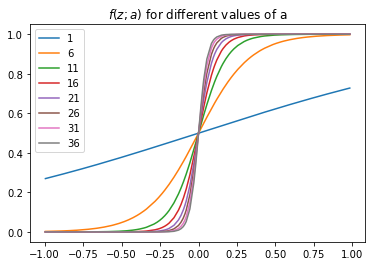

In [4]:
import numpy as np
from matplotlib import pyplot as plt
f = lambda a,z: 1/(1+np.exp(-a*z))
n=200
z = np.random.uniform(-1,1,n)

import seaborn as sns
for a in np.arange(1,40,5):
    sns.lineplot(z,f(a,z), label=a)
plt.title('$f(z;a)$ for different values of a')
plt.show()

## b)

We have the cost function 
$$
\begin{align*}
J(\theta) = \sum_{n=1}^{N} \big(y_n - f(\theta^Tx_n)\big)^2 = \sum_{n=1}^{N} \big(y_n - \frac{1}{1+exp(a\theta^Tx)}\big)^2
\end{align*}
$$
Setting $\sigma(a\theta^Tx) = \frac{1}{1+exp(a\theta^Tx)}$ and taking the gradient w.r.t $\theta$

$$
\begin{align*}
\nabla J(\theta) = -2\sum_{n=1}^{N} \big(y_n - \sigma(a\theta^Tx)\big) a\sigma(\theta^Tx) (1-\sigma(\theta^Tx))x_n
\end{align*}
$$

Our gradient descent scheme could be expressed as 
$$
\begin{align*}
\theta^{(i)} &= \theta^{(i-1)} - m_i \nabla J(\theta)\big|_{\theta=\theta^{(i-1)}} \\
&=\theta^{(i-1)} + m_i \sum_{n=1}^{N} \big(y_n - \sigma(a\theta^Tx)\big) a\sigma(\theta^Tx) (1-\sigma(\theta^Tx))x_n
\end{align*}
$$

## c)
Since we have plotted the function we can see that asymptotically it reaches the value `1` when x grows to +$\infty$ whereas the function reaches asymptotically the value `0` when x grows to - $\infty$. Since we cannot observe these values in real problems, it is not possible for the model to respond with a clear `1` or `0`

## d)
The response of the model can be interpreted as the probability of a datapoint to belong to class `1`.

## e)
Since we plotted the function for different values of $a$, we notice that by increasing its value the sigmoid shape becomes steeper. In the case where $a$ approaches infinity we end up with a step function that will respon|d only with `1` or `0`

# Exercise 3

We can exploit the fact that our values are sorted, by limiting our search for the splitting threshold in the area where class `0` overlaps with class `1` (if there is any overlap). Then we will calculate the Delta Impurity only for those datapoints and retrieve the datapoint with the largest impact on the original impurity

```python
def find_threshold(class_0, class_1)
    all = concatenate(class_0, class_1)
    overlap = class_0 > class_1
    if overlap == None:
        return max(class_0)
    impurity_t = calculate impurity at node t
    candidate_deltas = []
    for candidates in overlap:
        ty = all > threshold
        tn = all < threshold
        impurity_ty = calculate impurity at ty
        impurity_tn = calculate impurity at tn
        delta_impurity = impurity_t - ty/all impurity_ty - tn/all impurity_tn
        candidate_deltas.append(delta_impurity)
    return max(candidate_deltas)
```

# Exercise 4

for $x_1 <= 3$ we have
* $I(t) = -p(\omega_1)\log{p(\omega_1)} - p(\omega_2)\log{p(\omega_2)} = -\frac{2}{5}\log\frac{2}{5} -\frac{3}{5}\log\frac{3}{5} = 0.9710$
* $I(t_y) = -p(\omega_1)\log{p(\omega_1)} - p(\omega_2)\log{p(\omega_2)} = -\frac{2}{3}\log\frac{2}{3} -\frac{1}{3}\log\frac{1}{3} = 0.92$
* $I(t_n) = -p(\omega_1)\log{p(\omega_1)} - p(\omega_2)\log{p(\omega_2)} = -0\log0 - 1\log {1} = 0$
* $\Delta I = I(t) - \frac{N_{t_y}}{N_t} I(t_y) - \frac{N_{t_n}}{N_t} I(t_n) = 0.9710  - \frac{3}{5} 0.92 - \frac{2}{5}0 = 0.42$


# Exercrise 5

In [321]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
Dataset = sio.loadmat('HW8.mat')
train_x = Dataset['train_x']
train_y= Dataset['train_y'].reshape(-1)
test_x = Dataset['test_x']
test_y = Dataset['test_y'].reshape(-1)

## a) Bayesian Classifier

In [356]:
from scipy.stats import multivariate_normal
def class_statistics(class_, X, y):
    n = len(X)
    X = X[y==class_]
    p_omega = len(X) / n
    means = np.mean(X, axis=0)
    covariance = (X- means).T @ (X- means) / len(X) 
    return (p_omega, means, covariance)

p_omega_1, means_1, covariance_1 = class_statistics(1,train_x, train_y)
p_omega_2, means_2, covariance_2 = class_statistics(2,train_x, train_y)

posterior_1 = lambda x: multivariate_normal(means_1, covariance_1).pdf(x) * p_omega_1
posterior_2 = lambda x: multivariate_normal(means_2, covariance_2).pdf(x) * p_omega_2
predict_label = lambda x: np.argmax(np.column_stack([posterior_1(x), posterior_2(x)]),axis=1) + 1

In [358]:
Btest_y = predict_label(test_x)
classification_error_bc = np.sum(Btest_y != test_y) / len(test_y)
print ('Classification Error of Bayes Classifier:', classification_error_bc)

Classification Error of Bayes Classifier: 0.15


## b) Naive Bayes Classifier

In [359]:
from scipy.stats import multivariate_normal
def class_statistics(class_, X, y):
    n = len(X)
    X = X[y==class_]
    p_omega = len(X) / n
    means = np.mean(X, axis=0)
    covariance = (X- means).T @ (X- means) / len(X) * np.identity(X.shape[1])
    return (p_omega, means, covariance)

p_omega_1, means_1, covariance_1 = class_statistics(1,train_x, train_y)
p_omega_2, means_2, covariance_2 = class_statistics(2,train_x, train_y)

posterior_1 = lambda x: multivariate_normal(means_1, covariance_1).pdf(x) * p_omega_1
posterior_2 = lambda x: multivariate_normal(means_2, covariance_2).pdf(x) * p_omega_2
predict_label = lambda x: np.argmax(np.column_stack([posterior_1(x), posterior_2(x)]),axis=1) + 1

In [360]:
Btest_y = predict_label(test_x)
classification_error_nbc = np.sum(Btest_y != test_y) / len(test_y)
print ('Classification Error of Naive Bayes Classifier:', classification_error_nbc)

Classification Error of Bayes Classifier: 0.165


## c) KNN

In [363]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x, train_y)
Btest_y = knn.predict(test_x)
classification_error_knn = np.sum(Btest_y != test_y) / len(test_y)
print ('Classification Error of KNN Classifier:', classification_error_knn)

Classification Error of Bayes Classifier: 0.17


## d) Logistic Regression

In [366]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_x, train_y)
Btest_y = lr.predict(test_x)
classification_error_lr = np.sum(Btest_y != test_y) / len(test_y)
print ('Classification Error of Logistic Regression:', classification_error_lr)

Classification Error of Logistic Regression: 0.155


## e)

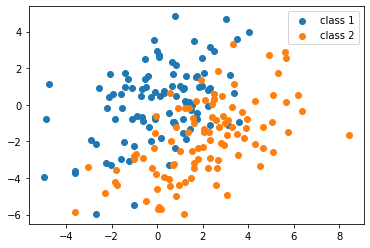

In [355]:
plt.scatter(train_x[train_y==1][:,0], train_x[train_y==1][:,1], label='class 1')
plt.scatter(train_x[train_y==2][:,0], train_x[train_y==2][:,1], label='class 2')
plt.legend()
plt.show()

## f)

In [368]:
print ('Classification Error of Bayes Classifier:', classification_error_bc)
print ('Classification Error of Naive Bayes Classifier:', classification_error_nbc)
print ('Classification Error of KNN Classifier:', classification_error_knn)
print ('Classification Error of Logistic Regression:', classification_error_lr)

Classification Error of Bayes Classifier: 0.15
Classification Error of Naive Bayes Classifier: 0.165
Classification Error of KNN Classifier: 0.17
Classification Error of Logistic Regression: 0.155


* Bayes Classifier achieves the best score, since looking at the plot we can observe 2 different normal distributions with covariance matrices which are not diagonal. Since we have only a 2 features, there are not many parameters that need to be estimated for the Bayes Classifier. As a result it approaches better the model that generated the data
* Naive Bayes Classifier achieves a slightly worse score. It assumes independence between the features of each class, something that is not observed in the data. The results would be the same as the Bayes classifier if the covariance matrices of the 2 classes were diagonal
* KNN classifier has the worst performance. As it is a non parametric model, it fails to approach the model that generated the data and the patterns it creates
* Logistic Regression has a good score. Even though it did not make any assumptions on the distribution it managed to approach pretty good the model that generated the data